In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

file_path = "marketing_and_product_edit.csv"
df = pd.read_csv(file_path)
print(df)

      Clicks  Revenue_Generated
0     4946.0           15520.09
1      570.0           30866.17
2     3546.0           32585.62
3     2573.0           95740.12
4      818.0           81990.43
...      ...                ...
9995    25.0           95399.69
9996  3503.0           38999.04
9997  1140.0           39646.56
9998  1078.0            6785.63
9999  1682.0           96707.63

[10000 rows x 2 columns]


In [66]:
x = df.iloc[:, :].values
print(x)

[[ 4946.   15520.09]
 [  570.   30866.17]
 [ 3546.   32585.62]
 ...
 [ 1140.   39646.56]
 [ 1078.    6785.63]
 [ 1682.   96707.63]]


In [67]:
print(df.isna())

      Clicks  Revenue_Generated
0      False              False
1      False              False
2      False              False
3      False              False
4      False              False
...      ...                ...
9995   False              False
9996   False              False
9997   False              False
9998   False              False
9999   False              False

[10000 rows x 2 columns]


In [68]:
print('Total missing values per column: ')
print(df.isna().sum())

Total missing values per column: 
Clicks               24
Revenue_Generated    38
dtype: int64


In [69]:
print('Total missing values: ', df.isna().sum().sum())

Total missing values:  62


In [70]:
imputer = SimpleImputer(strategy = 'median')
x[:] = imputer.fit_transform(x)
print(x[:30])

[[ 4946.    15520.09 ]
 [  570.    30866.17 ]
 [ 3546.    32585.62 ]
 [ 2573.    95740.12 ]
 [  818.    81990.43 ]
 [ 1259.    65792.3  ]
 [ 3882.    54205.71 ]
 [  230.    82083.18 ]
 [ 4657.    95260.16 ]
 [ 3027.    25569.45 ]
 [ 4449.    67630.55 ]
 [ 3528.    63178.82 ]
 [ 2385.    62705.47 ]
 [ 2659.    10906.87 ]
 [ 1087.    82691.34 ]
 [  868.    22019.07 ]
 [ 2872.    81902.94 ]
 [ 1582.    38536.95 ]
 [ 2453.5   50091.17 ]
 [ 2453.5   56029.73 ]
 [ 2453.5   46426.93 ]
 [ 2453.5   23255.86 ]
 [ 2453.5   68453.18 ]
 [ 2453.5   99186.53 ]
 [ 2453.5   54481.48 ]
 [ 4867.     8356.41 ]
 [ 3700.    93046.27 ]
 [ 4039.    49455.275]
 [ 1808.    49455.275]
 [ 1946.    49455.275]]


In [71]:
print(np.isnan(x).sum())

0


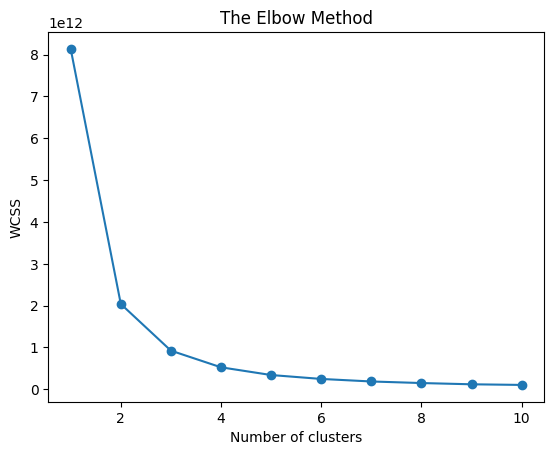

In [72]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
kmeans = KMeans (n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans[:30])

[1 3 3 2 2 0 0 2 2 1 0 0 0 1 2 1 2 3 3 0 3 1 0 2 0 1 2 3 3 3]


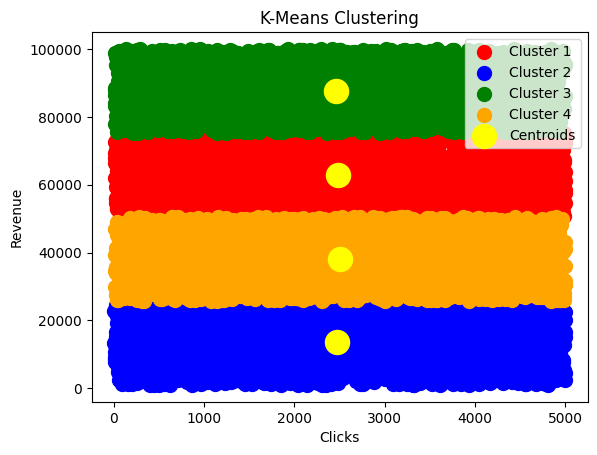

In [74]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='orange', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')
plt.xlabel('Clicks')
plt.ylabel('Revenue')
plt.title('K-Means Clustering')
plt.legend()
plt.show()